**Import library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

**Import dataset**

In [4]:
churn = pd.read_csv('Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Preprocessing**

In [5]:
churn.shape

(10000, 14)

In [6]:
churn.size

140000

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Plot Outliers in dataset**

**Age**

In [10]:
#create a box plot
import plotly.express as px
fig = px.box(churn, y='Age')

fig.show()

**Sur-name**

In [11]:
#create a histogram

fig = px.histogram(churn, x='Surname')

fig.show()

**Geography**

In [12]:
#create a histogram

fig = px.histogram(churn, x='Geography')

fig.show()

**Count the outliers using function**

In [13]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [14]:
outliers = find_outliers_IQR(churn['Age'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 359
max outlier value: 92
min outlier value: 63


In [15]:
outliers = find_outliers_IQR(churn['CreditScore'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 15
max outlier value: 382
min outlier value: 350


In [16]:

outliers = find_outliers_IQR(churn['NumOfProducts'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 60
max outlier value: 4
min outlier value: 4


**Handle The outliers of Age columns**

In [17]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(churn['Age'], 10)
ninetieth_percentile = np.percentile(churn['Age'], 90)
# print(tenth_percentile, ninetieth_percentile)
b = np.where(churn['Age']<tenth_percentile, tenth_percentile, churn['Age'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

New array: [42. 41. 42. ... 36. 42. 28.]


**Count the outlier after handle outliers**

In [18]:
def find_np_outliers_IQR(df):

   q1=np.quantile(df,0.25)

   q3=np.quantile(df,0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [19]:
outliers = find_np_outliers_IQR(b)

print('number of outliers in Age column: '+ str(len(outliers)))


number of outliers in Age column: 0


In [20]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(churn['NumOfProducts'], 10)
ninetieth_percentile = np.percentile(churn['NumOfProducts'], 90)
# print(tenth_percentile, ninetieth_percentile)
prod = np.where(churn['NumOfProducts']<tenth_percentile, tenth_percentile, churn['NumOfProducts'])
prod = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",prod)

New array: [2. 2. 2. ... 2. 2. 2.]


In [21]:
outliers = find_np_outliers_IQR(prod)

print('number of outliers in Number of product : '+ str(len(outliers)))

number of outliers in Number of product : 0


**Add Columns after handle he outliers**

In [22]:
churn['Age']=b.tolist()

In [23]:
churn['NumOfProducts']=prod.tolist()

In [24]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,2.0,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,2.0,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,2.0,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,2.0,1,1,79084.10,0


**Data Visualization**


**Analysis of Categorical Variables**

In [25]:
list_c = ["Geography","Gender","Tenure","HasCrCard","IsActiveMember","Exited"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



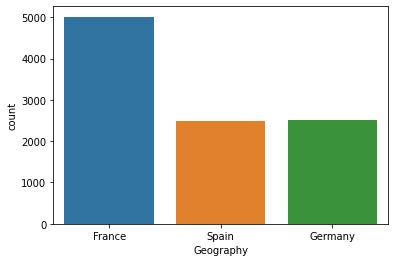

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



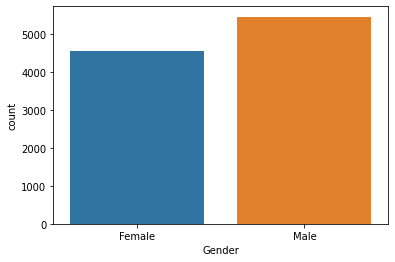

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



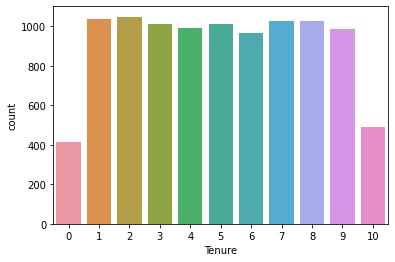

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



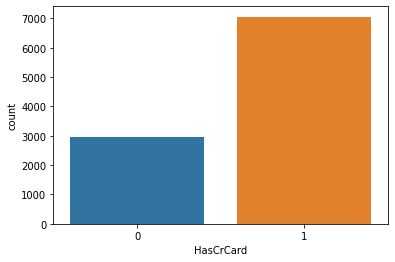

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



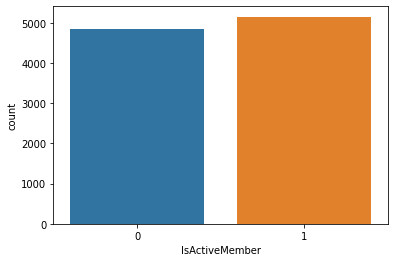

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



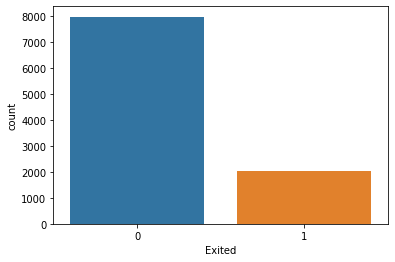

In [26]:
def cat_analysis(variable):
   sns.countplot(churn[variable])
   plt.show()
for cat in list_c:
    cat_analysis(cat)

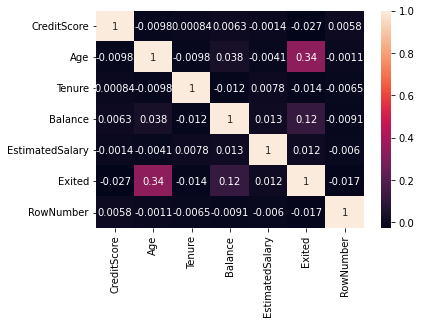

In [27]:
list_corr = ["CreditScore","Age","Tenure","Balance","EstimatedSalary","Exited","RowNumber"]
sns.heatmap(churn[list_corr].corr(), annot = True)

In [28]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
fig = px.sunburst(churn, path=['IsActiveMember', 'HasCrCard'])
fig.update_traces(textinfo='label + percent parent')

In [30]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



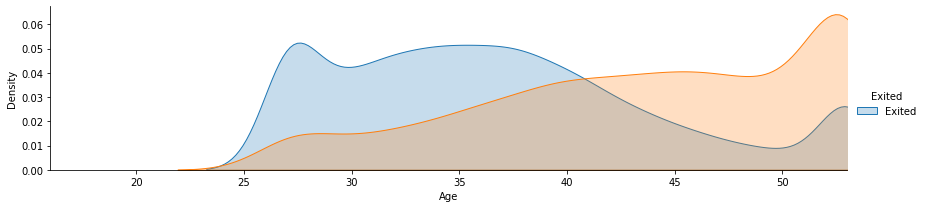

In [31]:
#visulaization relation between Age and Exited
FacetGrid = sns.FacetGrid(churn, hue='Exited', aspect=4)
FacetGrid.map(sns.kdeplot, 'Age', shade=True )
FacetGrid.set(xlim=(16, churn['Age'].max()))
FacetGrid.add_legend(labels = ["Exited"])

**Dependent and independent features**

In [32]:
churn.drop(['Surname','RowNumber'],axis=1,inplace=True)

In [33]:
x=churn.drop('Exited',axis=1)


In [34]:
y=churn['Exited']

In [35]:
x=pd.get_dummies(x)

In [36]:
x

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42.0,2,0.00,2.0,1,1,101348.88,1,0,0,1,0
1,15647311,608,41.0,1,83807.86,2.0,0,1,112542.58,0,0,1,1,0
2,15619304,502,42.0,8,159660.80,2.0,1,0,113931.57,1,0,0,1,0
3,15701354,699,39.0,1,0.00,2.0,0,0,93826.63,1,0,0,1,0
4,15737888,850,43.0,2,125510.82,2.0,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39.0,5,0.00,2.0,1,0,96270.64,1,0,0,0,1
9996,15569892,516,35.0,10,57369.61,2.0,1,1,101699.77,1,0,0,0,1
9997,15584532,709,36.0,7,0.00,2.0,0,1,42085.58,1,0,0,1,0
9998,15682355,772,42.0,3,75075.31,2.0,1,0,92888.52,0,1,0,0,1


**Train_test_split**

In [37]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("the shape of x_train",x_train.shape)
print("the shape of y_train",y_train.shape)
print("the shape of x_test",x_test.shape)
print("the shape of y_test",y_test.shape)

the shape of x_train (7500, 14)
the shape of y_train (7500,)
the shape of x_test (2500, 14)
the shape of y_test (2500,)


**Data Normalization**

In [38]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Machine Learning**

**Decision Tree Classifier**

In [39]:
# fit the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [40]:
# make prediction
pred_1 = model.predict(x_test)

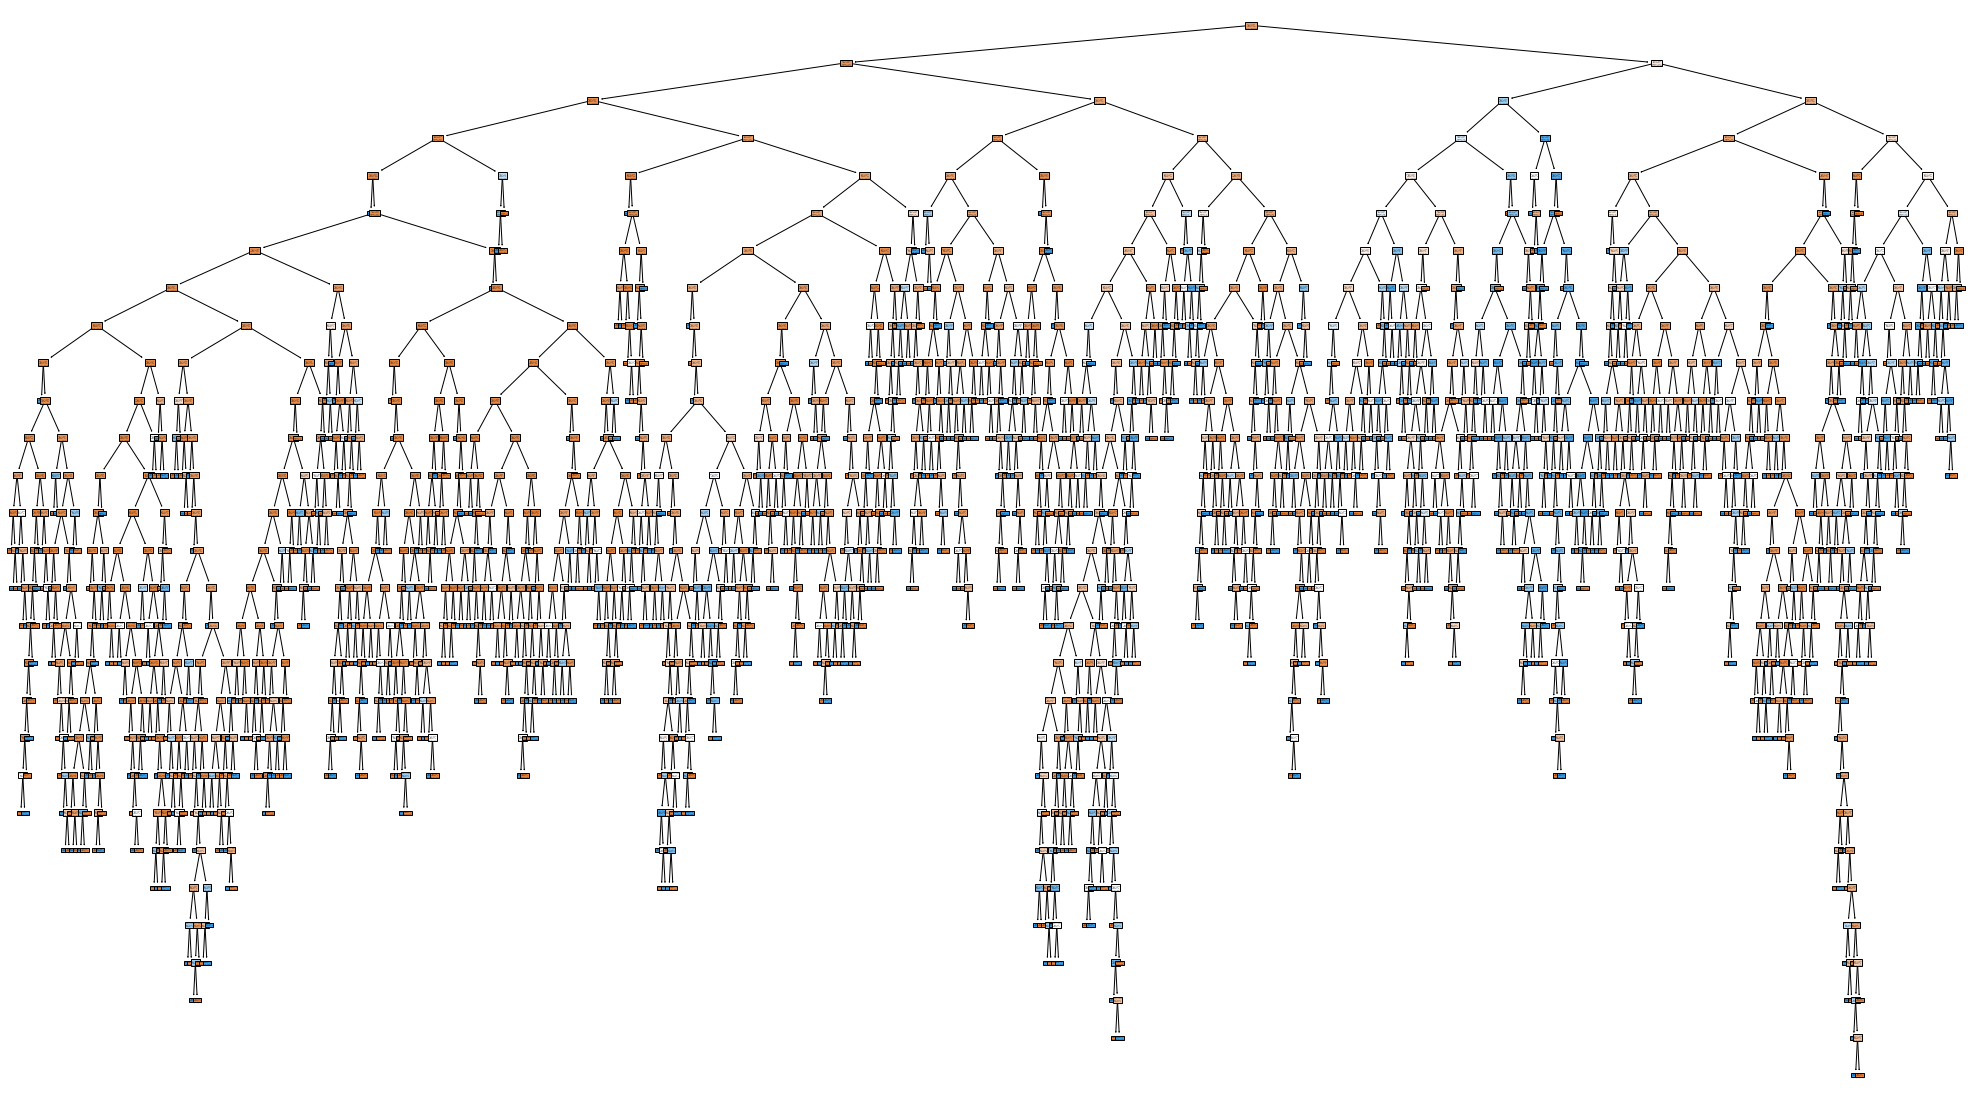

In [41]:
from sklearn import tree
plt.figure(figsize=(35, 20))
tree.plot_tree(model, filled=True)
plt.show()

**Training Score and testing score**

In [42]:
print("Training set score: {:.4f}".format(model.score(x_train,y_train)))

print("Validation set score: {:.4f}".format(model.score(x_test,y_test)))

Training set score: 1.0000
Validation set score: 0.7340


**Accuracy**

In [43]:
# calculate accuracy score
accuracy_score(y_test,pred_1)

0.734

**Model Evaluation**

In [44]:
print("the precsion score is : ",precision_score(y_test,pred_1))
print("the recall score is :",recall_score(y_test,pred_1))
print("the f1 measure is ",f1_score(y_test,pred_1))

the precsion score is :  0.34615384615384615
the recall score is : 0.38028169014084506
the f1 measure is  0.3624161073825503


**Confusion matrix**

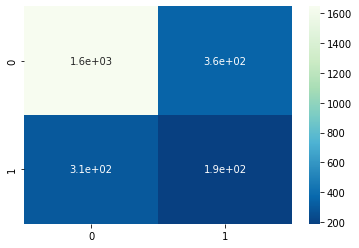

In [45]:
cm=confusion_matrix(y_test,pred_1)
sns.heatmap(cm,annot=True,cmap="GnBu_r")

**SVM**

In [46]:
model_1 = svm.SVC()
model_1.fit(x_train, y_train)

SVC()

**Prediction**

In [47]:
# make prediction
pred_2 = model_1.predict(x_test)

**Training and Testing**

In [48]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(model_1.score(x_train,y_train)))

print("Validation set score: {:.4f}".format(model_1.score(x_test,y_test)))

Training set score: 0.8368
Validation set score: 0.8360


**Accuracy score**

In [49]:
# calculate accuracy score
accuracy_score(y_test, pred_2)

0.836

**Evaluation Metrics**

In [50]:
print("the precsion score is : ",precision_score(y_test, pred_2))
print("the recall score is :",recall_score(y_test, pred_2))
print("the f1 measure is ",f1_score(y_test, pred_2))

the precsion score is :  0.7919463087248322
the recall score is : 0.23742454728370221
the f1 measure is  0.3653250773993808


**Confusion Matrix**

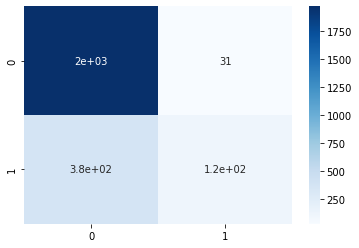

In [51]:
cm=confusion_matrix(y_test, pred_2)

sns.heatmap(cm,annot=True,cmap="Blues")


**Random Forest**

In [52]:
model_2=RandomForestClassifier()
model_2.fit(x_train, y_train)

RandomForestClassifier()

**Prediction**

In [53]:
# make prediction
pred_3 = model_2.predict(x_test)

**Training and Testing accuracy**

In [54]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(model_2.score(x_train,y_train)))

print("validation set score: {:.4f}".format(model_2.score(x_test,y_test)))

Training set score: 1.0000
validation set score: 0.8376


**Accuracy_Score**

In [55]:
# calculate accuracy score
accuracy_score(y_test, pred_3)

0.8376

**Model evaluation**

In [56]:
print("the precsion score is : ",precision_score(y_test, pred_3))
print("the recall score is :",recall_score(y_test, pred_3))
print("the f1 measure is ",f1_score(y_test, pred_3))

the precsion score is :  0.6986899563318777
the recall score is : 0.32193158953722334
the f1 measure is  0.44077134986225897


**Confusion Matrix**

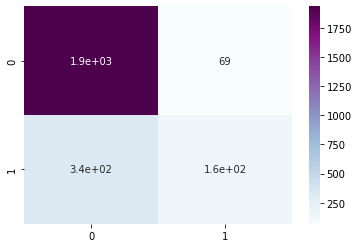

In [57]:
cm=confusion_matrix(y_test, pred_3)
sns.heatmap(cm,annot=True,cmap="BuPu")


**Important Features**

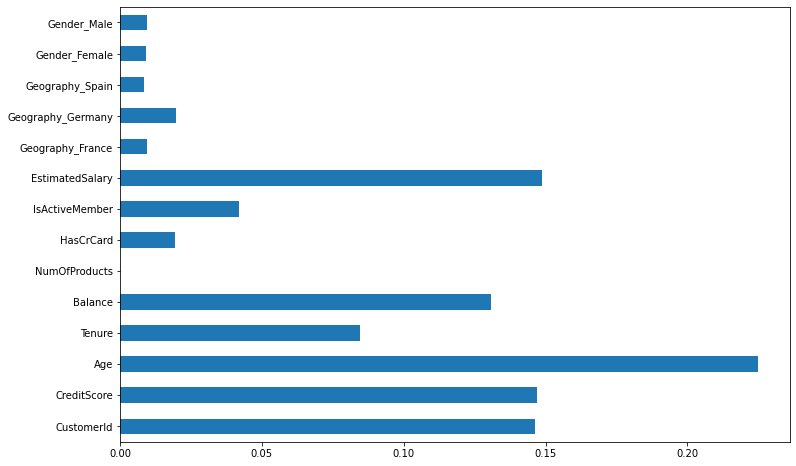

In [58]:
# extract feature importances, convert into a Series
importances = pd.Series(model_2.feature_importances_, index=x.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

**Results**

In [59]:
d={
    'metricss':["Accuracy","Precision","recall","F1_Measure"],
'Decision_tree_results':['75%','36%','38%','37%'],
'SVM_results':['83%','79%','23%','36%'],
'Random Forest results':['84%','71%','32%','44%'],
}
df_result=pd.DataFrame(data=d)
df_result.set_index('metricss')

,Decision_tree_results,SVM_results,Random Forest results
metricss,,,
Accuracy,75%,83%,84%
Precision,36%,79%,71%
recall,38%,23%,32%
F1_Measure,37%,36%,44%
